In [77]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math

In [78]:
with open('business_df.pickle', 'rb') as handle:
    business_df = pickle.load(handle)
len(business_df)

174567

In [80]:
business_new_df = pd.DataFrame(business_df.groupby('name').size()).reset_index()
business_new_df.columns = ['name', 'counts']
business_new_df = business_new_df.nlargest(10, 'counts')

In [81]:
business_new_df

,name,counts
108096,Starbucks,936
73895,McDonald's,695
109570,Subway,686
89709,Pizza Hut,301
112202,Taco Bell,293
19554,Burger King,289
127423,Walgreens,287
128250,Wendy's,256
119227,The UPS Store,242
120282,Tim Hortons,235


In [90]:
mcd_df = business_df[business_df['name'] == 'Starbucks']

In [91]:
mcd_df.head(1)

,business_id,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
20,lHYiCS-y8AFjUitv6MGpxg,Toronto,1,43.639863,-79.419533,Starbucks,M6K 3S3,21,4.0,ON


In [92]:
review_stars = mcd_df['stars']
print(len(review_stars))

936


In [93]:
rs = np.array(review_stars)
print(rs.mean())
print(rs.std())

3.25
0.6785794614266523


936
{1: 4, 1.5: 11, 2: 52, 2.5: 141, 3: 243, 3.5: 267, 4: 165, 4.5: 47, 5: 6}
0
3.25
0.6785794614266523


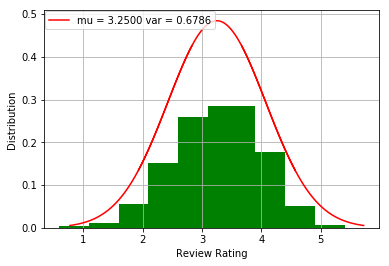

In [113]:
import seaborn as sns
review_star = review_stars
n = len(review_star)
print(n)
data = [x for x in review_star]
final_result = {1:0, 1.5:0, 2:0, 2.5:0, 3:0, 3.5:0, 4:0, 4.5:0, 5:0}
for x in review_star:
    final_result[x] = final_result[x] + 1

print(final_result)

X = []
P = []

def draw_graph(mu, sig2):
    z = 3
    X = np.arange(mu-z*np.sqrt(sig2), mu+z*np.sqrt(sig2), 0.001)
    for i in X:
        P.append(np.exp(-(i - mu)**2 / (2*sig2) ) / np.sqrt(2*np.pi*sig2))
    s = "mu = %.4f var = %.4f" % (mu, sig2)
    plt.step(X, P, label=s, color='r')
    plt.grid()
    plt.legend(bbox_to_anchor=(0,1),loc=2,borderaxespad=0.1)

x_label = list(final_result.keys())
y_label=[]

for x in list(final_result.values()):
    y_label.append(float(x)/n)


plt.xlabel('Review Rating')
plt.ylabel('Distribution')

plt.bar(x_label, y_label, color='g')

arr = np.array(review_star)
mean = np.mean(arr)
std = np.std(arr)
print(mean)
print(std)



draw_graph(mean, std)
plt.savefig('elite_user_normal_distribution.png')

plt.show()

In [116]:
from scipy import stats
stats.ks_2samp(P, y_label)

Ks_2sampResult(statistic=0.3429091644750152, pvalue=0.19259877577564505)